In [56]:
import torch
import torch.nn as nn
from torchdiffeq import odeint
import torch.optim as optim
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
def true_solution(t):
    return torch.sin(t)

In [64]:

# Define the NeuralODE class
class NeuralODEFunc(nn.Module):
    def __init__(self):
        super(NeuralODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
    
    def forward(self, t, y):
        return self.net(y)

In [79]:

# Define the NeuralODE class
class Neural(nn.Module):
    def __init__(self):
        super(Neural, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
    
    def forward(self,y):
        return self.net(y)

In [68]:


# Time points for simulation
t = torch.linspace(0, 10, 1000)

# Generate noisy sine wave data
true_data = true_solution(t)


# Create NeuralODEFunc instance


In [75]:
func = NeuralODEFunc()

# Integrate using NeuralODE
optimizer = optim.Adam(func.parameters(), lr=0.1)

In [70]:
true_data.shape

torch.Size([1000])

In [72]:
true_data = true_data.view(1000, 1)

In [73]:
true_data.shape

torch.Size([1000, 1])

In [49]:
pred_y = odeint(func,true_data[0],t)

In [76]:
for i in range(1000):
    optimizer.zero_grad()
    
    
    #print(init,batch_t,truth)
    pred_y = odeint(func,true_data[0],t,method='rk4')
    loss = F.mse_loss(pred_y, true_data)
    loss.backward()
    
    optimizer.step()
   
    
    if i % 100 == 0:
        with torch.no_grad():
            pred_y = odeint(func,true_data[0],t,method='rk4')
            loss = F.mse_loss(pred_y, true_data)
            print('Iter {:04d} | Total Loss {:.6f}'.format(i, loss.item()))
            x_pred = pred_y.detach().numpy()

            # Extract the x, y, z coordinates from X_train_plt
            x_train = true_data
            plt.plot(t, true_data, label='True Sine Wave')
            plt.plot(t, pred_y.detach().numpy(), label='NeuralODE Prediction')

            plt.tight_layout()
            plt.show()
            clear_output(wait=True)

KeyboardInterrupt: 

In [86]:
model = Neural()

# Integrate using NeuralODE
optimizer = optim.Adam(model.parameters(), lr=0.01)

Iter 0099 | Total Loss 0.000166


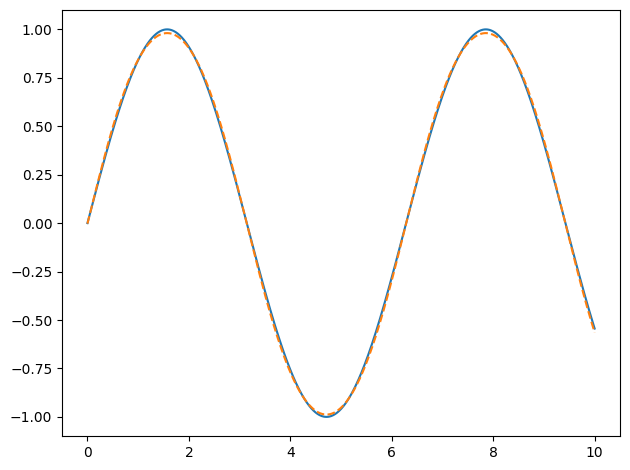

In [87]:
for i in range(100):
    optimizer.zero_grad()
    
    
    #print(init,batch_t,truth)
    pred_y = model(true_data)
    loss = F.mse_loss(pred_y, true_data)
    loss.backward()
    
    optimizer.step()
   
    
    if i % 1 == 0:
        with torch.no_grad():
            pred_y = model(true_data)
            loss = F.mse_loss(pred_y, true_data)
            print('Iter {:04d} | Total Loss {:.6f}'.format(i, loss.item()))
            x_pred = pred_y.detach().numpy()

            # Extract the x, y, z coordinates from X_train_plt
            x_train = true_data
            plt.plot(t, true_data, label='True Sine Wave')
            plt.plot(t, pred_y.detach().numpy(), label='NeuralODE Prediction',linestyle='--')   

            plt.tight_layout()
            plt.show()
            clear_output(wait=True)

In [67]:
with torch.no_grad():  
    pred_data = odeint(func,true_data[0],t)

AssertionError: underflow in dt nan

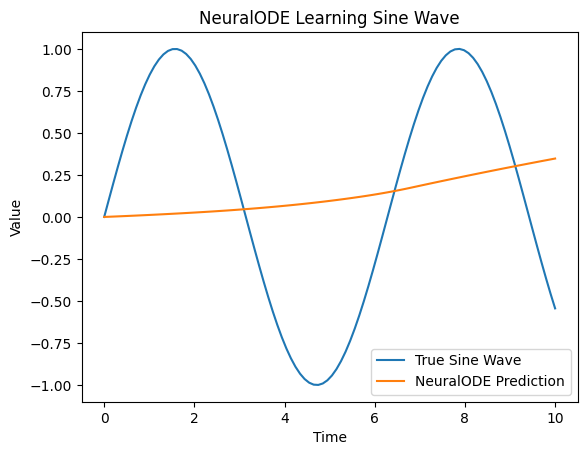

In [60]:

plt.plot(t, true_data, label='True Sine Wave')
plt.plot(t, pred_data[:, 0], label='NeuralODE Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NeuralODE Learning Sine Wave')
plt.show()
